# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 2 </center>

## <center>Grupo 21</center>

#### Integrantes: Francisco Juárez, Lucas Aldazabal, Valentin Schneider, Gonzalo Rizzo Ehrenbock

# <center> Procesamiento del Lenguaje Natural <center/> 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_theme(style="whitegrid")

In [3]:
#Import dataframe
ds_propiedades = pd.read_csv('./ds_propiedades_total_clasificado.csv')
ds_descripciones = pd.read_csv('./properati_argentina_2021_decrip.csv')
ds_propiedades.head()

,id,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio
0,F5IvmD1uzzdIR7b96ozt4g==,-34.558855,-58.452458,Nuñez,Departamento,4.0,3.0,160.0,146.0,460000.0,Venta: Hermoso piso de categoría en excelente ...,2875.000000,alto
1,IiT/P7WfYDcqbhu7tf5V4Q==,-34.582403,-58.443841,Colegiales,Departamento,2.0,1.0,50.0,46.0,148000.0,Departamento - Colegiales,2960.000000,alto
2,6XXcElx/4OwCcH4NI06Oiw==,-34.605825,-58.422214,Almagro,Departamento,3.0,2.0,47.0,47.0,89000.0,Departamento en venta tres ambientes- Almagro,1893.617021,medio
3,8R7hSzqWFk9rX4wBXxfORA==,-34.561971,-58.455670,Belgrano,Departamento,2.0,1.0,52.0,48.0,127000.0,Departamento - Belgrano,2442.307692,medio
4,UAKYqQx9s0MfIdLzrJv8Ig==,-34.606738,-58.389426,Tribunales,Departamento,3.0,2.0,76.0,75.0,129900.0,Lindísimo departamento antiguo en excelente es...,1709.210526,bajo


In [4]:
ds_descripciones.head()

,id,property_description
0,BZCeiGkJr1WBUi6pKJQwJQ==,Corredor Responsable: MARIA ALEJANDRA GENOVEVA...
1,zuHOGgUE0UB71W7m/YCLoA==,¡HERMOSO PH TIPO CASA DE 2 AMBIENTES!<br>APTO ...
2,TUL813tXchVBlHUsfaA6DA==,Excelente PH en Núñez 4 amb!!!! Oportunidad !!...
3,gn55JPmcjftBV/at1a7fPg==,"UNICO PH DE 4 DORMITORIOS EN IMPECABLE ESTADO,..."
4,qg4m3QHcuo1+wMmyp7kx3Q==,Ph 2 Amb. Villa Crespo exclusivo uso profesion...


In [5]:
# save ds_descripciones to txt
ds_descripciones.drop(['id'], axis=1, inplace=True)
ds_descripciones



,property_description
0,Corredor Responsable: MARIA ALEJANDRA GENOVEVA...
1,¡HERMOSO PH TIPO CASA DE 2 AMBIENTES!<br>APTO ...
2,Excelente PH en Núñez 4 amb!!!! Oportunidad !!...
3,"UNICO PH DE 4 DORMITORIOS EN IMPECABLE ESTADO,..."
4,Ph 2 Amb. Villa Crespo exclusivo uso profesion...
...,...
460149,Corredor Responsable: Hector Garaygorta / Cris...
460150,Corredor Responsable: MARIA DEL ROSARIO NEME -...
460151,En cumplimiento de las leyes provinciales vige...
460152,En cumplimiento de las leyes provinciales vige...


## Exportamos el dataframe a un archivo de texto para poder pasarlo por ECmes

In [51]:
ds_descripciones

# save ds_descripciones to txt
ds_descripciones.to_csv('ds_descripciones.txt', index=False)


##### por ahora no usamos esto, pero capaz lo necesitamos en algun momento

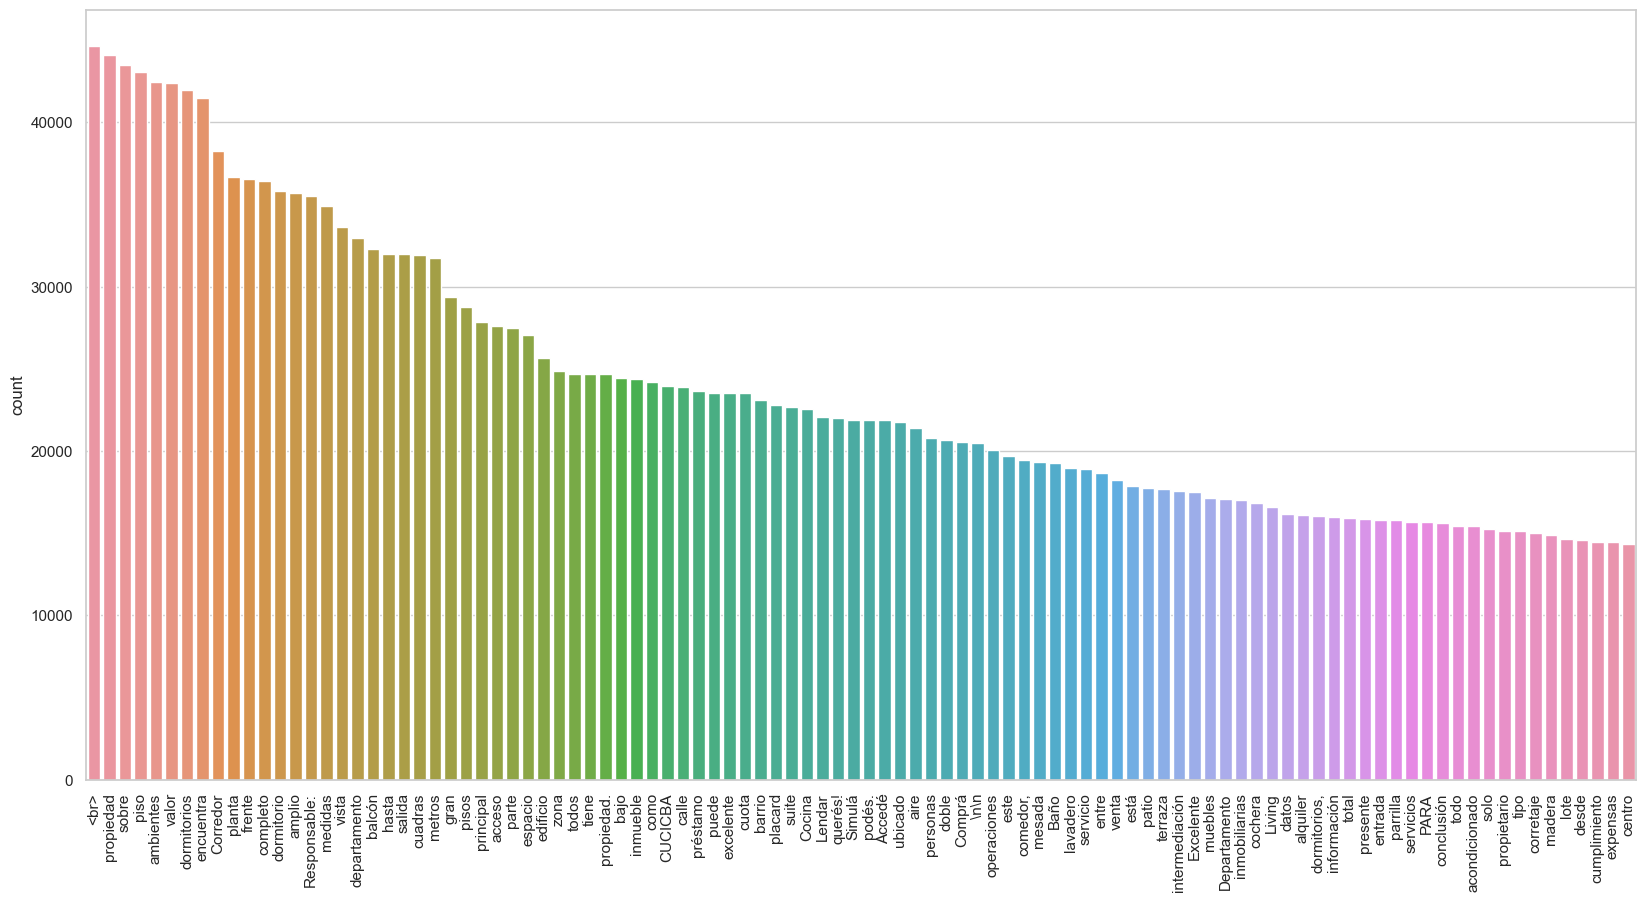

In [49]:
# count how many times every word appears in ds_descripciones['property_description']
# and save it in a dictionary


word_count = {}
palabras_ignoradas = ['para', 'baño', 'cocina', 'comedor','casa','cuenta','esta','living']


for i in range(len(ds_descripciones['property_description'])-300000):
    if type(ds_descripciones['property_description'][i]) == str:
        for word in ds_descripciones['property_description'][i].split():
            if len(word) < 4 or word in palabras_ignoradas:
                continue
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1

# save dictionary in a dataframe

word_count_aux = word_count.copy()

for key, value in word_count_aux.items():
    if value <= 300:
        del word_count[key]

df_word_count = pd.DataFrame.from_dict(word_count, orient='index', columns=['count'])
df_word_count.sort_values(by=['count'], ascending=False, inplace=True)
df_word_count



# barplot of the 20 most common words
plt.figure(figsize=(20,10))
sns.barplot(x=df_word_count.index[:100], y=df_word_count['count'][:100])
plt.xticks(rotation=90)
plt.show()
